In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 598


In [3]:
# Set the API base URL
url = 'https://api.openweathermap.org/data/2.5/weather?'

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}appid={weather_api_key}&q={city}&units=metric"
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json() 

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        city_date = city_weather['dt']

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | invercargill
Processing Record 2 of Set 1 | port-aux-francais
Processing Record 3 of Set 1 | waitangi
Processing Record 4 of Set 1 | puerto deseado
Processing Record 5 of Set 1 | isafjordur
Processing Record 6 of Set 1 | monrovia
Processing Record 7 of Set 1 | olonkinbyen
Processing Record 8 of Set 1 | ribeira grande
Processing Record 9 of Set 1 | yellowknife
Processing Record 10 of Set 1 | 'ohonua
City not found. Skipping...
Processing Record 11 of Set 1 | margaret river
Processing Record 12 of Set 1 | tamanrasset
Processing Record 13 of Set 1 | bilibino
Processing Record 14 of Set 1 | tanrake village
City not found. Skipping...
Processing Record 15 of Set 1 | pemangkat
Processing Record 16 of Set 1 | al kharijah
Processing Record 17 of Set 1 | port mathurin
Processing Record 18 of Set 1 | iqaluit
Processing Record 19 of Set 1 | buabidi
City not found. Skipping...
Processing Record 20 of Set 1 |

In [4]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          566
Lat           566
Lng           566
Max Temp      566
Humidity      566
Cloudiness    566
Wind Speed    566
Country       566
Date          566
dtype: int64

In [5]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,invercargill,-46.4000,168.3500,8.81,89,94,3.76,NZ,1686525984
1,port-aux-francais,-49.3500,70.2167,5.19,92,100,18.19,TF,1686525984
2,waitangi,-43.9535,-176.5597,13.79,93,100,5.85,NZ,1686525942
3,puerto deseado,-47.7503,-65.8938,4.92,65,40,13.72,AR,1686525984
4,isafjordur,66.0755,-23.1240,7.85,80,33,7.14,IS,1686525985


In [8]:
# Export the City_Data into a csv
city_data_df.to_csv("cities.csv", index_label="City_ID")

In [9]:
# Read saved data
city_data_df = pd.read_csv("cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,invercargill,-46.4000,168.3500,8.81,89,94,3.76,NZ,1686525984
1,port-aux-francais,-49.3500,70.2167,5.19,92,100,18.19,TF,1686525984
2,waitangi,-43.9535,-176.5597,13.79,93,100,5.85,NZ,1686525942
3,puerto deseado,-47.7503,-65.8938,4.92,65,40,13.72,AR,1686525984
4,isafjordur,66.0755,-23.1240,7.85,80,33,7.14,IS,1686525985


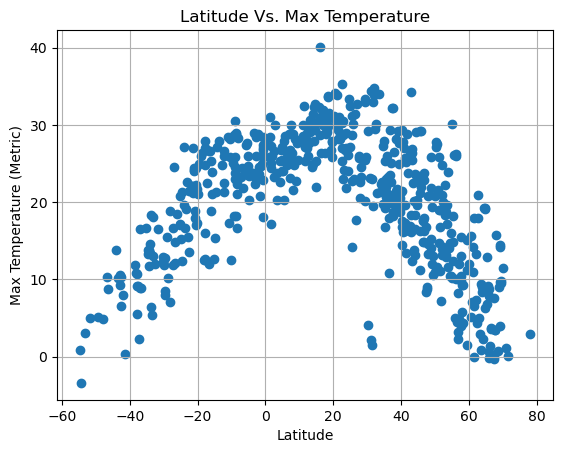

In [11]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df['Lat'],city_data_df['Max Temp'])

# Incorporate the other graph properties
plt.title('Latitude Vs. Max Temperature')
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (Metric)')
plt.grid(True)

# Save the figure
plt.savefig("Fig1.png")

# Show plot
plt.show()

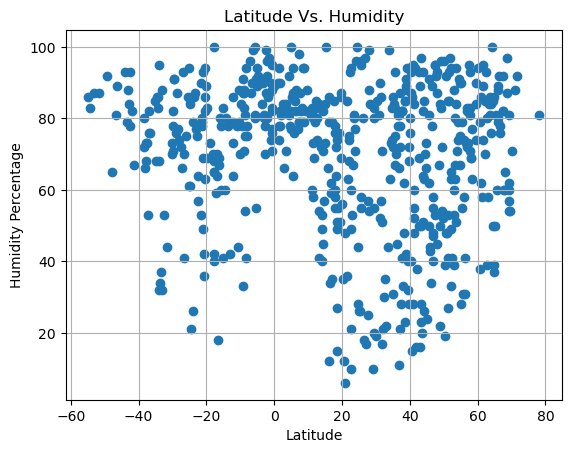

In [12]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df['Lat'],city_data_df['Humidity'])

# Incorporate the other graph properties
plt.title('Latitude Vs. Humidity')
plt.xlabel('Latitude')
plt.ylabel('Humidity Percentage')
plt.grid(True)

# Save the figure
plt.savefig("Fig2.png")

# Show plot
plt.show()

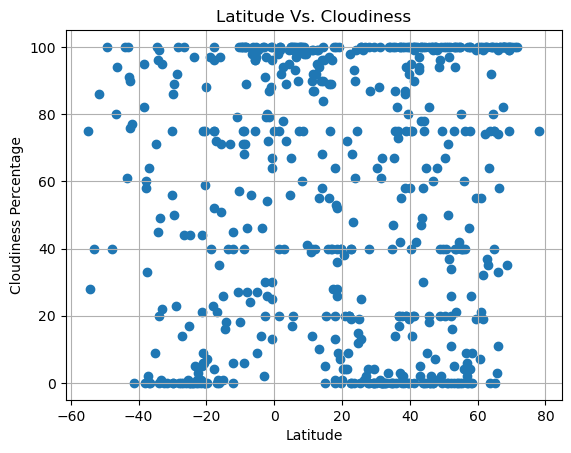

In [13]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df['Lat'],city_data_df['Cloudiness'])

# Incorporate the other graph properties
plt.title('Latitude Vs. Cloudiness')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness Percentage')
plt.grid(True)


# Save the figure
plt.savefig("Fig3.png")

# Show plot
plt.show()

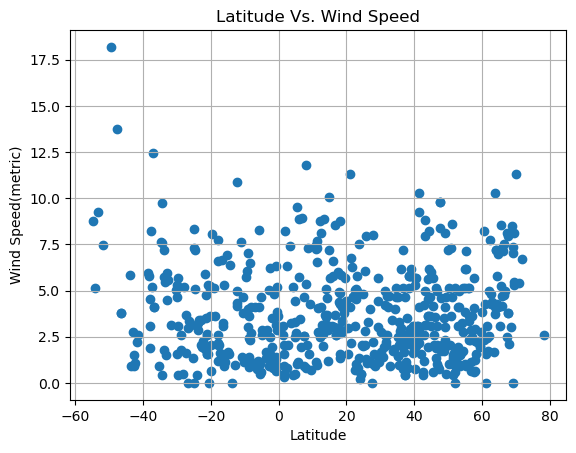

In [14]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df['Lat'],city_data_df['Wind Speed'])

# Incorporate the other graph properties
plt.title('Latitude Vs. Wind Speed')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed(metric)')
plt.grid(True)


# Save the figure
plt.savefig("Fig4.png")

# Show plot
plt.show()

The r-value is: 0.02
The r-value is: 0.02
The r-value is: 0.01
The r-value is: 0.00


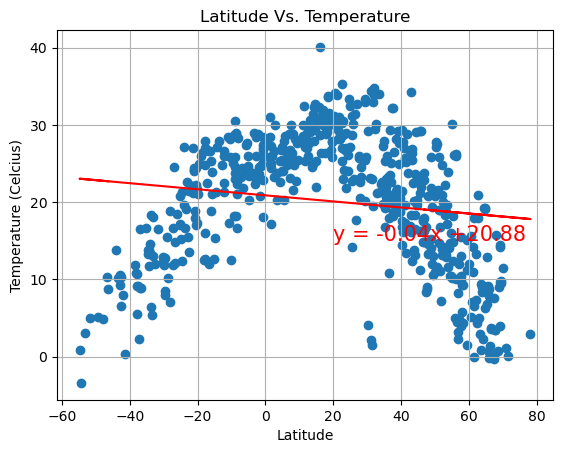

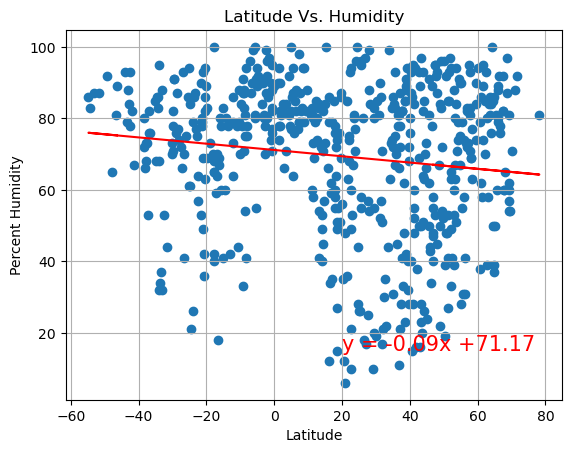

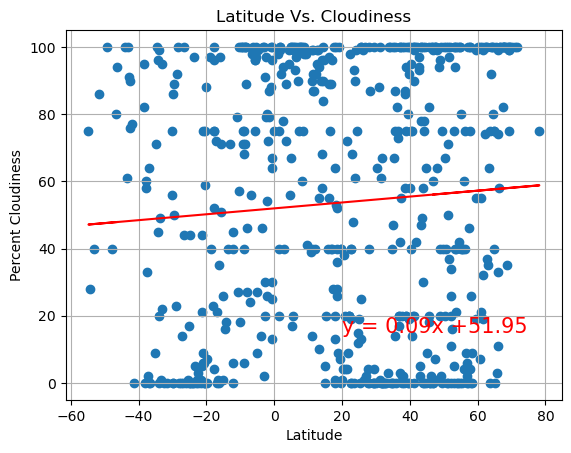

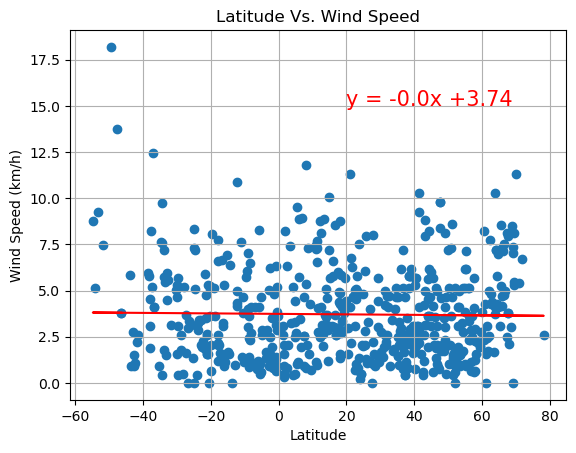

In [15]:
# Define a function to create Linear Regression plots
x_values = city_data_df['Lat']
y_values = [city_data_df['Max Temp'], city_data_df['Humidity'],city_data_df['Cloudiness'], city_data_df['Wind Speed']]
ylabel = ['Temperature (Celcius)', 'Percent Humidity', 'Percent Cloudiness', 'Wind Speed (km/h)']
title = ['Latitude Vs. Temperature', 'Latitude Vs. Humidity', 'Latitude Vs. Cloudiness', 'Latitude Vs. Wind Speed']

for i in range(len(y_values)):
    def line_regress(x_values, y_values):
        (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values[i])
        regress_values = x_values * slope + intercept
        
        fig, ax = plt.subplots()
        plt.scatter(x_values, y_values[i], marker='o')
        plt.plot(x_values, regress_values, "r-")
        line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
        
        plt.title(title[i])
        plt.xlabel('Latitude')
        plt.ylabel(ylabel[i])
        plt.grid(True)
        plt.annotate(line_eq,(20,15),fontsize=15,color="red")
        
        print(f"The r-value is: {rvalue**2:.2f}")
        
    line_regress(x_values, y_values)

In [16]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df[city_data_df['Lat'] >= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
4,isafjordur,66.0755,-23.1240,7.85,80,33,7.14,IS,1686525985
5,monrovia,6.3005,-10.7969,24.87,88,97,3.45,LR,1686525818
6,olonkinbyen,70.9221,-8.7187,1.09,88,100,5.43,SJ,1686525985
7,ribeira grande,38.5167,-28.7000,19.87,85,86,5.81,PT,1686525954
8,yellowknife,62.4560,-114.3525,4.29,93,100,7.72,CA,1686525857


In [17]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df[city_data_df['Lat'] < 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,invercargill,-46.4000,168.3500,8.81,89,94,3.76,NZ,1686525984
1,port-aux-francais,-49.3500,70.2167,5.19,92,100,18.19,TF,1686525984
2,waitangi,-43.9535,-176.5597,13.79,93,100,5.85,NZ,1686525942
3,puerto deseado,-47.7503,-65.8938,4.92,65,40,13.72,AR,1686525984
9,margaret river,-33.9500,115.0667,13.44,68,99,5.73,AU,1686525808


The r-value is: 0.5463906289383288


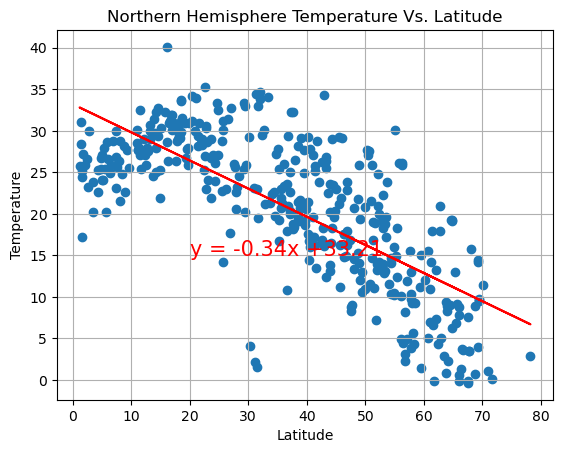

In [18]:
# Linear regression on Northern Hemisphere
# Linear regression on Northern Hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Max Temp']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

plt.title('Northern Hemisphere Temperature Vs. Latitude')
plt.ylabel('Temperature')
plt.xlabel('Latitude')
plt.annotate(line_eq,(20,15),fontsize=15,color="red")

plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, "r-")
plt.grid(True)

print(f"The r-value is: {rvalue**2}")

plt.show()

The r-value is: 0.6716816243027516


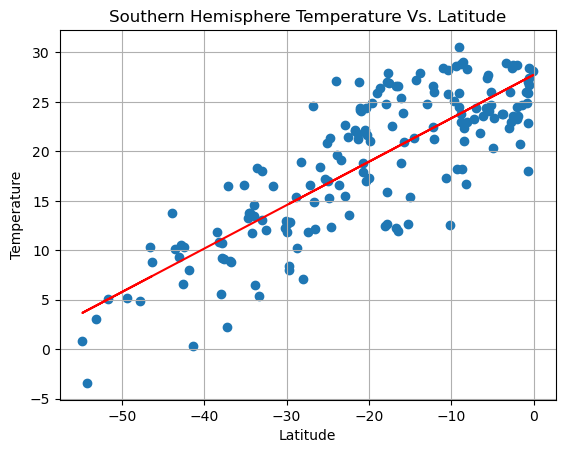

In [19]:
# Linear regression on Southern Hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Max Temp']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

plt.title('Southern Hemisphere Temperature Vs. Latitude')
plt.ylabel('Temperature')
plt.xlabel('Latitude')
plt.annotate(line_eq,(20,15),fontsize=15,color="red")

plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, "r-")
plt.grid(True)

print(f"The r-value is: {rvalue**2}")

plt.show()

The r-value is: 0.00010850368923635903


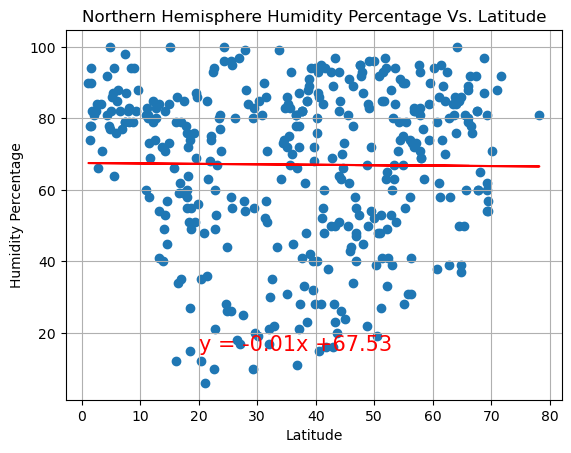

In [20]:
# Northern Hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Humidity']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

plt.title('Northern Hemisphere Humidity Percentage Vs. Latitude')
plt.ylabel('Humidity Percentage')
plt.xlabel('Latitude')
plt.annotate(line_eq,(20,15),fontsize=15,color="red")

plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, "r-")
plt.grid(True)

print(f"The r-value is: {rvalue**2}")

plt.show()

The r-value is: 0.014519241614735614


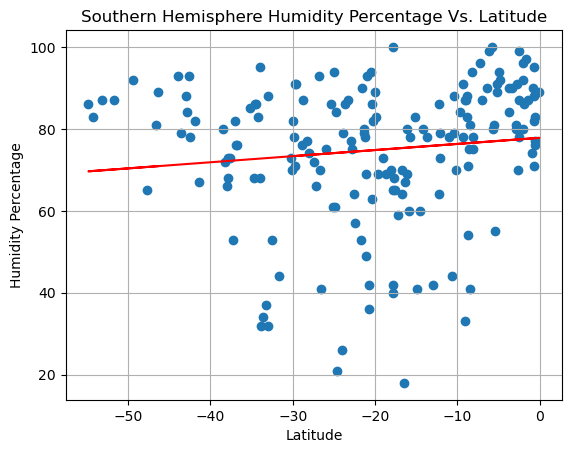

In [21]:
# Southern Hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Humidity']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

plt.title('Southern Hemisphere Humidity Percentage Vs. Latitude')
plt.ylabel('Humidity Percentage')
plt.xlabel('Latitude')
plt.annotate(line_eq,(20,15),fontsize=15,color="red")

plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, "r-")
plt.grid(True)

print(f"The r-value is: {rvalue**2}")

plt.show()

The r-value is: 0.0005731405197280201


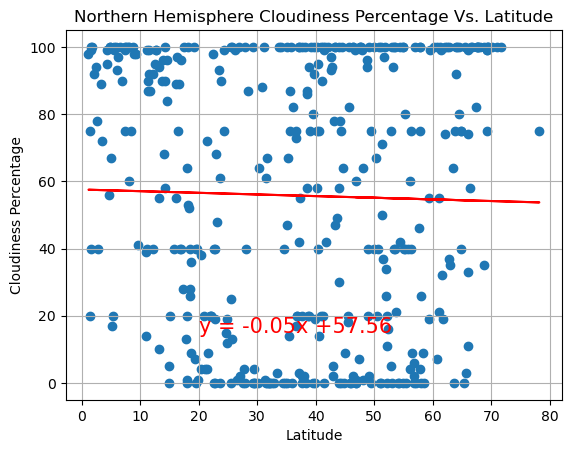

In [22]:
# Northern Hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Cloudiness']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

plt.title('Northern Hemisphere Cloudiness Percentage Vs. Latitude')
plt.ylabel('Cloudiness Percentage')
plt.xlabel('Latitude')
plt.annotate(line_eq,(20,15),fontsize=15,color="red")

plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, "r-")
plt.grid(True)

print(f"The r-value is: {rvalue**2}")

plt.show()

The r-value is: 0.012910850077599113


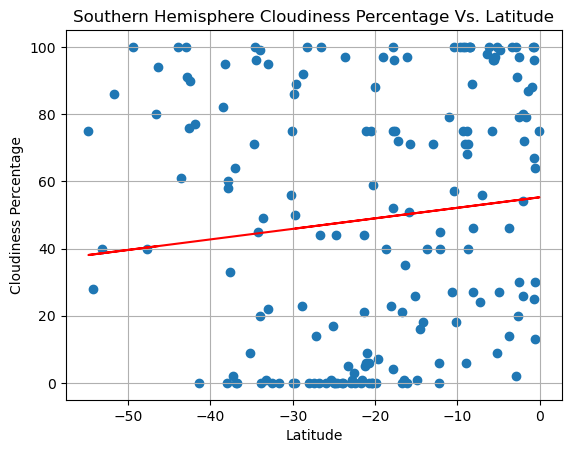

In [23]:
# Southern Hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Cloudiness']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

plt.title('Southern Hemisphere Cloudiness Percentage Vs. Latitude')
plt.ylabel('Cloudiness Percentage')
plt.xlabel('Latitude')
plt.annotate(line_eq,(20,15),fontsize=15,color="red")

plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, "r-")
plt.grid(True)

print(f"The r-value is: {rvalue**2}")

plt.show()

The r-value is: 0.0012202747885903269


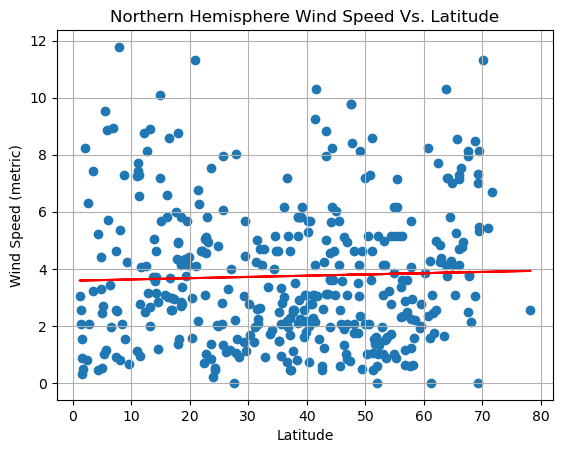

In [24]:
# Northern Hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Wind Speed']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

plt.title('Northern Hemisphere Wind Speed Vs. Latitude')
plt.ylabel('Wind Speed (metric)')
plt.xlabel('Latitude')
plt.annotate(line_eq,(20,15),fontsize=15,color="red")

plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, "r-")
plt.grid(True)

print(f"The r-value is: {rvalue**2}")

plt.show()

The r-value is: 0.10627229371504407


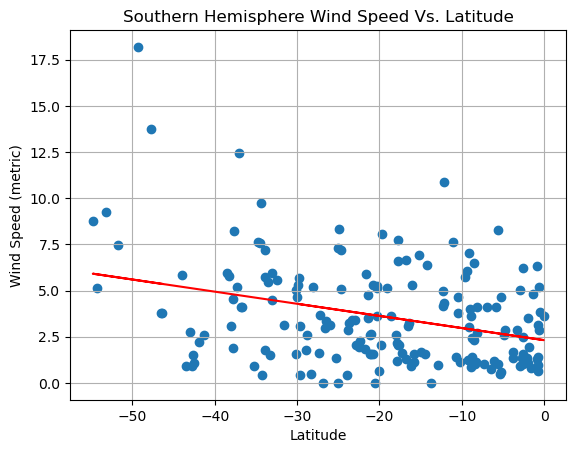

In [25]:
# Southern Hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Wind Speed']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

plt.title('Southern Hemisphere Wind Speed Vs. Latitude')
plt.ylabel('Wind Speed (metric)')
plt.xlabel('Latitude')
plt.annotate(line_eq,(20,15),fontsize=15,color="red")

plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, "r-")
plt.grid(True)

print(f"The r-value is: {rvalue**2}")

plt.show()

In [ ]:
#DISCUSSION ABOUT THE LINEAR RELATIONSHIP
From the outputs provided by these analyses, it seems that there is not a very strong correlation between the wind speed in a certain hemisphere and the particular
latitude of a certain city within that hemisphere.  